In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
wine_data=pd.read_csv('/content/winequality-red.csv')

In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


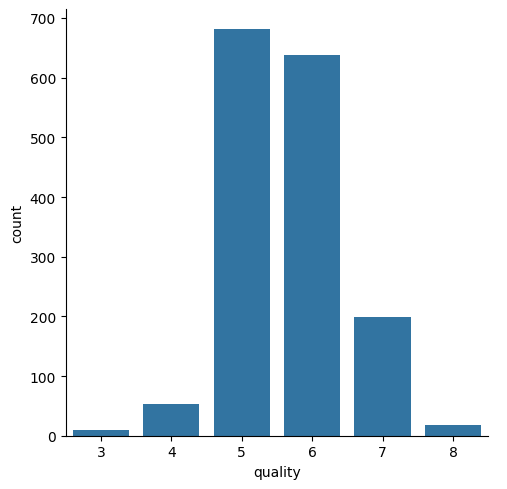

In [8]:
#Data visualization
sns.catplot(x='quality',data=wine_data,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

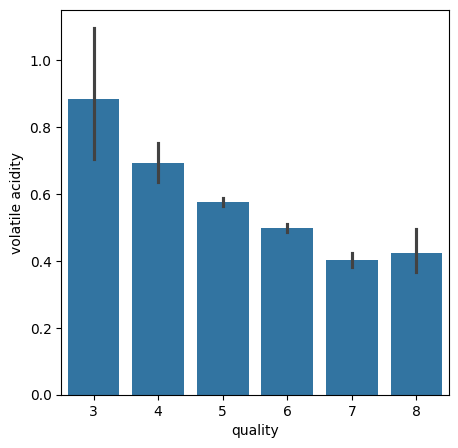

In [9]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

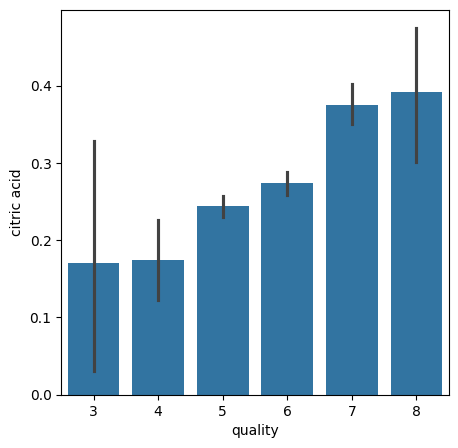

In [10]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

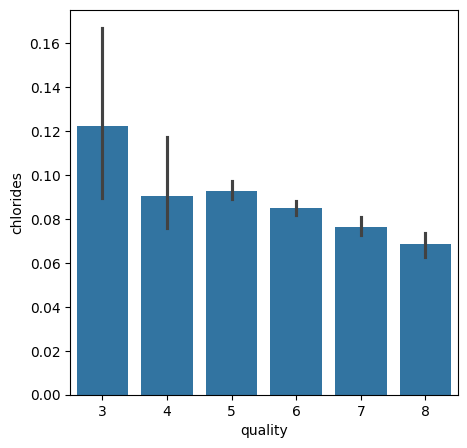

In [11]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_data)

In [14]:
#correlation
correlation=wine_data.corr()

<Axes: >

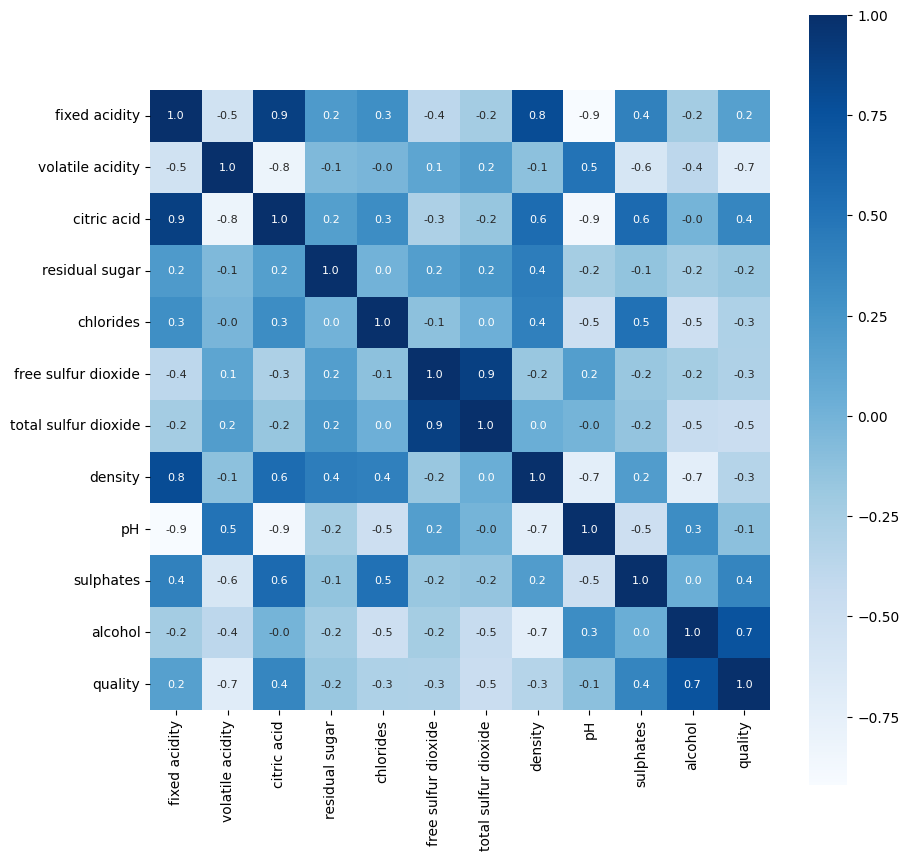

In [15]:
#constructing heatmap to understand the correlation of columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
#preprocessing the data that is seprating the data and label
x=wine_data.drop('quality', axis=1)


In [17]:
print(x)

                      fixed acidity  volatile acidity  citric acid  ...        pH  sulphates   alcohol
fixed acidity              1.000000         -0.256131     0.671703  ... -0.682978   0.183006 -0.061668
volatile acidity          -0.256131          1.000000    -0.552496  ...  0.234937  -0.260987 -0.202288
citric acid                0.671703         -0.552496     1.000000  ... -0.541904   0.312770  0.109903
residual sugar             0.114777          0.001918     0.143577  ... -0.085652   0.005527  0.042075
chlorides                  0.093705          0.061298     0.203823  ... -0.265026   0.371260 -0.221141
free sulfur dioxide       -0.153794         -0.010504    -0.060978  ...  0.070377   0.051658 -0.069408
total sulfur dioxide      -0.113181          0.076470     0.035533  ... -0.066495   0.042947 -0.205654
density                    0.668047          0.022026     0.364947  ... -0.341699   0.148506 -0.496180
pH                        -0.682978          0.234937    -0.541904  ...  

In [18]:
#Label binarization as we require only two quality values there are multiple values for the quality
y=wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [20]:
print(y)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Name: quality, dtype: int64


In [21]:
#train and test split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(y.shape,y_train.shape,y_test.shape)

(12,) (9,) (3,)


In [22]:
# model training
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [24]:
#model evaluation
x_test=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test,y_test)
print(test_data_accuracy)


1.0


In [25]:
input_data=(11.2,	0.28,	0.56,	1.9,	0.075,	17.0,	60.0,	0.9980,	3.16,	0.58,	9.8	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine
